HIYA SUROVITA SAHA : 20MS60R20

PREDICTION OF DIGITAL AD-CLICKING FOR BUSINESS STRATREGY

Predicting that  a random digital advertisement is going to be clicked by the user or not.Here a logistic regression model is used to fit the training data. A dataset  with nine distinct feature is used to build the model.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [2]:
ad_data = pd.read_csv('C:/Users/Hiya/adclick/advertising.csv')

In [3]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,27/03/2016 0:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,04/04/2016 1:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,13/03/2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,10/01/2016 2:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,03/06/2016 3:36,0


In [4]:
ad_data.info()
ad_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  900 non-null    float64
 1   Age                       900 non-null    int64  
 2   Area Income               900 non-null    float64
 3   Daily Internet Usage      900 non-null    float64
 4   Ad Topic Line             900 non-null    object 
 5   City                      900 non-null    object 
 6   Male                      900 non-null    int64  
 7   Country                   900 non-null    object 
 8   Timestamp                 900 non-null    object 
 9   Clicked on Ad             900 non-null    int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 70.4+ KB


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,65.425800,35.903333,55315.072767,180.702344,0.483333,0.487778
std,15.712563,8.744462,13376.323458,43.823397,0.500000,0.500129
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.000000
25%,52.160000,29.000000,47494.787500,139.245000,0.000000,0.000000
50%,68.945000,35.000000,57631.345000,184.555000,0.000000,0.000000
75%,78.610000,41.000000,65666.300000,219.720000,1.000000,1.000000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.000000


Text(0.5, 0, 'Age')

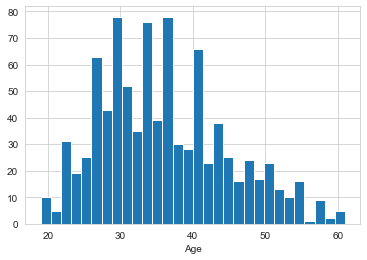

In [5]:
sns.set_style('whitegrid')
ad_data['Age'].hist(bins=30)
plt.xlabel('Age')

In [6]:
pd.crosstab(ad_data['Country'], ad_data['Clicked on Ad']).sort_values( 1,ascending = False).tail(10)

Clicked on Ad,0,1
Country,,
Malaysia,2,0
Tunisia,3,0
Bolivia,6,0
San Marino,2,0
Colombia,1,0
Niue,3,0
Niger,1,0
Comoros,1,0
Nicaragua,3,0


In [7]:
ad_data[ad_data['Clicked on Ad']==1]['Country'].value_counts().head(10)

Turkey           7
Australia        7
South Africa     6
Liechtenstein    6
Hungary          5
Ethiopia         5
Peru             5
Afghanistan      5
Samoa            4
Kenya            4
Name: Country, dtype: int64

In [8]:
ad_data['Country'].value_counts().head(10)

Greece            8
Micronesia        8
Turkey            8
Czech Republic    8
Australia         8
Peru              8
South Africa      8
Fiji              7
Taiwan            7
Senegal           7
Name: Country, dtype: int64

In [9]:
pd.crosstab(index=ad_data['Country'],columns='count').sort_values(['count'], ascending=False).head(10)

col_0,count
Country,
Australia,8
Greece,8
Czech Republic,8
Micronesia,8
Peru,8
South Africa,8
Turkey,8
Afghanistan,7
France,7


In [10]:
ad_data.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [11]:
type(ad_data['Timestamp'][1])

str

In [13]:

ad_data['Timestamp'] = pd.to_datetime(ad_data['Timestamp'])# Extract datetime variables using timestamp column
ad_data['Month'] = ad_data['Timestamp'].dt.month  # Converting timestamp column into datatime object in order to extract new features

In [14]:
# Creates a new column called Month, Day, Hour, 
ad_data['Day'] = ad_data['Timestamp'].dt.day
ad_data['Hour'] = ad_data['Timestamp'].dt.hour
ad_data["Weekday"] = ad_data['Timestamp'].dt.dayofweek

In [15]:
# Dropping timestamp column to avoid redundancy
ad_data = ad_data.drop(['Timestamp'], axis=1)
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Clicked on Ad,Month,Day,Hour,Weekday
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,0,3,27,0,6
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,0,4,4,1,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,0,3,13,20,6
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,0,10,1,2,5
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,0,3,6,3,6


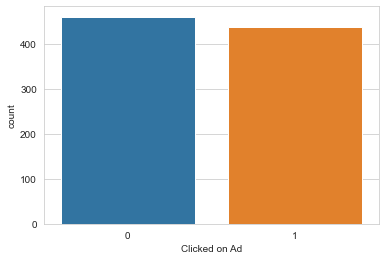

In [16]:
sns.countplot(x = 'Clicked on Ad', data = ad_data)

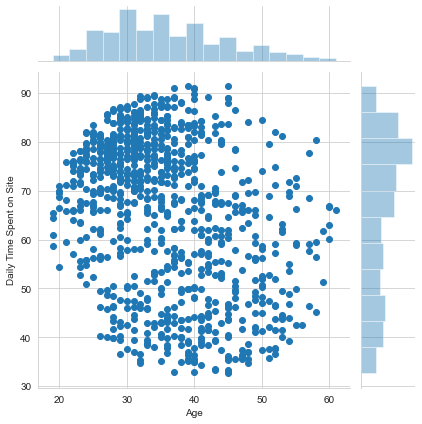

In [17]:
# Jointplot of daily time spent on site and age 
sns.jointplot(x = "Age", y= "Daily Time Spent on Site", data = ad_data)

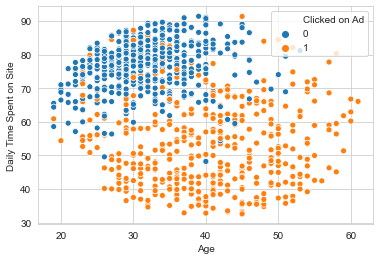

In [18]:
# scatterplot of daily time spent on site and age with clicking ads as hue
sns.scatterplot(x = "Age", y= "Daily Time Spent on Site",hue='Clicked on Ad', data = ad_data)

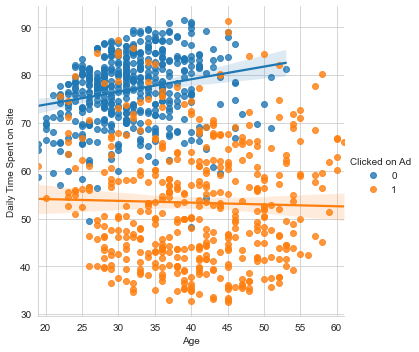

In [19]:
# Jointplot of daily time spent on site and age clicking ads as hue
sns.lmplot(x = "Age", y= "Daily Time Spent on Site",hue='Clicked on Ad', data = ad_data) 

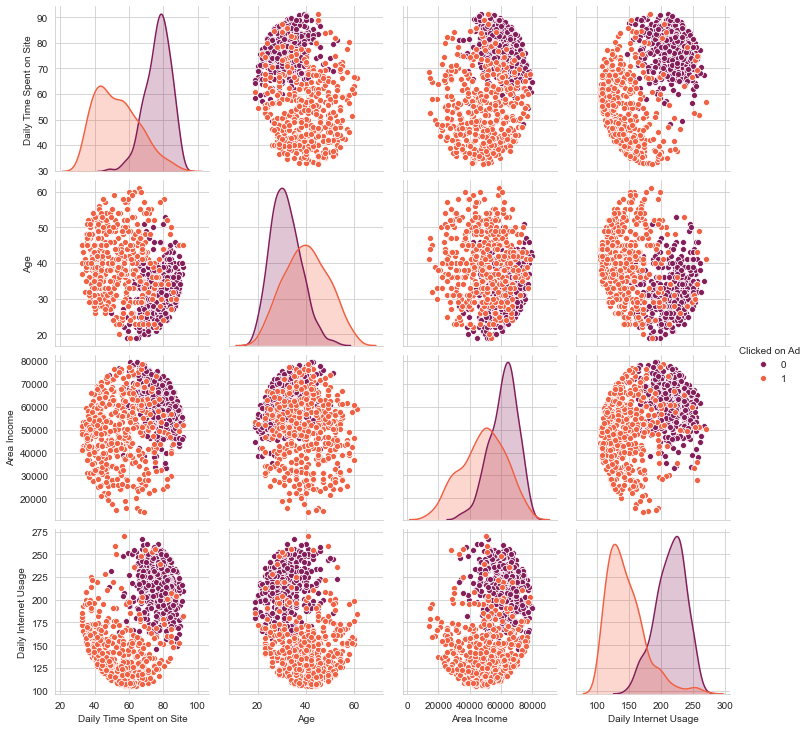

In [20]:
# Creating a pairplot with hue defined by Clicked on Ad column
sns.pairplot(ad_data, hue = 'Clicked on Ad', vars = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage'],palette = 'rocket')

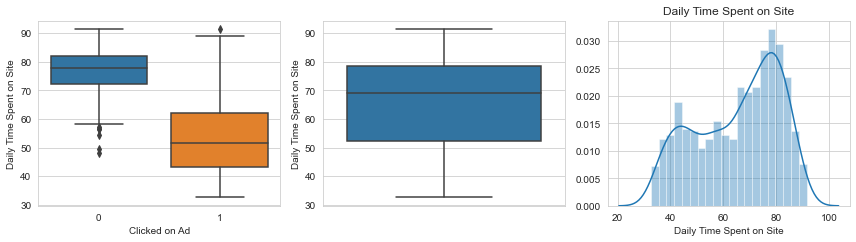

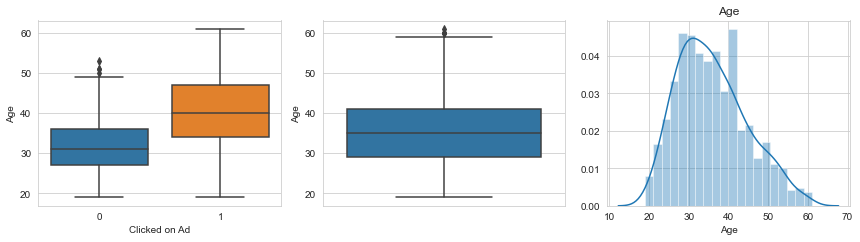

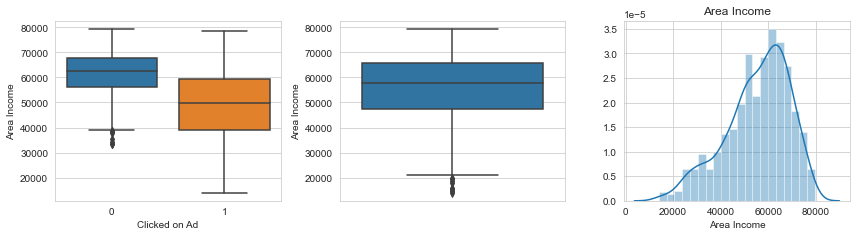

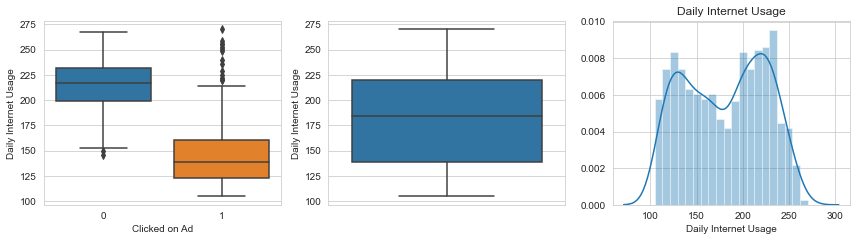

In [21]:
plots = ['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage']
for i in plots:
    plt.figure(figsize = (12, 6))
    
    plt.subplot(2,3,1)
    sns.boxplot(data= ad_data, y=ad_data[i],x='Clicked on Ad')
    plt.subplot(2,3,2)
    sns.boxplot(data= ad_data, y=ad_data[i])
    plt.subplot(2,3,3)
    sns.distplot(ad_data[i],bins= 20,)       
    plt.tight_layout()
    plt.title(i)    
    plt.show()


In [22]:
print('oldest person didn\'t clicked on the ad was of was of:', ad_data['Age'].max(), 'Years')
print('oldest person who clicked on the ad was of:', ad_data[ad_data['Clicked on Ad']==0]['Age'].max(), 'Years')

print('Youngest person was of:', ad_data['Age'].min(), 'Years')
print('Youngest person who clicked on the ad was of:', ad_data[ad_data['Clicked on Ad']==0]['Age'].min(), 'Years')

print('Average age was of:', ad_data['Age'].mean(), 'Years')

oldest person didn't clicked on the ad was of was of: 61 Years
oldest person who clicked on the ad was of: 53 Years
Youngest person was of: 19 Years
Youngest person who clicked on the ad was of: 19 Years
Average age was of: 35.903333333333336 Years


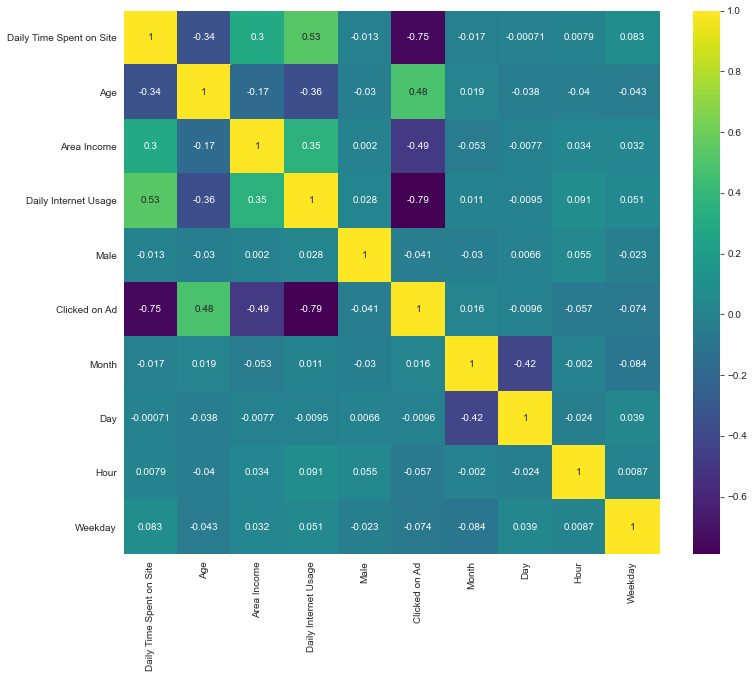

In [23]:
fig = plt.figure(figsize = (12,10))
sns.heatmap(ad_data.corr(), cmap='viridis', annot = True) # Degree of relationship i.e correlation using heatmap

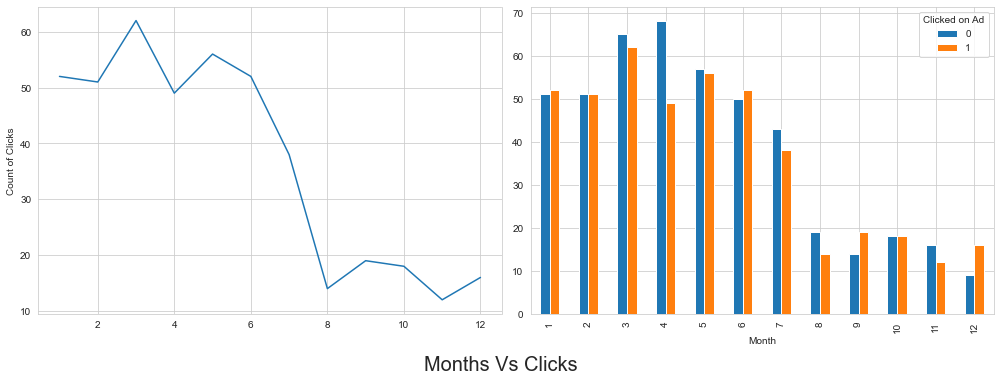

In [24]:
f,ax=plt.subplots(1,2,figsize=(14,5))
ad_data['Month'][ad_data['Clicked on Ad']==1].value_counts().sort_index().plot(ax=ax[0])
ax[0].set_ylabel('Count of Clicks')
pd.crosstab(ad_data["Clicked on Ad"], ad_data["Month"]).T.plot(kind = 'bar',ax=ax[1])
ad_data.groupby(['Month'])['Clicked on Ad'].sum() 
plt.tight_layout()
plt.suptitle('Months Vs Clicks',y=0,size=20)
plt.show()

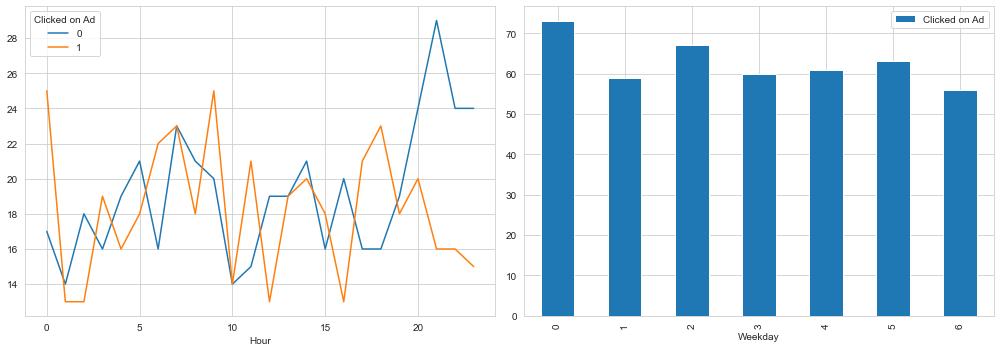

In [25]:
f,ax=plt.subplots(1,2,figsize=(14,5))
pd.crosstab(ad_data["Clicked on Ad"], ad_data["Hour"]).T.plot(style = [], ax = ax[0])
pd.pivot_table(ad_data, index = ['Weekday'], values = ['Clicked on Ad'],aggfunc= np.sum).plot(kind = 'bar', ax=ax[1]) # 0 - Monday
plt.tight_layout()
plt.show()

In [26]:
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = ad_data['Clicked on Ad']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(603, 5) (603,)
(297, 5) (297,)


In [59]:
logmodel = LogisticRegression(solver='lbfgs')
logmodel.fit(X_train,y_train)

LogisticRegression()

In [60]:
predictions = logmodel.predict(X_test)

In [61]:
x=confusion_matrix(y_test, predictions)
print(x)
Accuracy=((x[0][0]+x[1][1])/(x[0][0]+x[0][1]+x[1][0]+x[1][1]))*100
print("Acuuracy = ",Accuracy, "%")

[[138   8]
 [ 10 141]]
Acuuracy =  93.93939393939394 %
